In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
import scipy.ndimage as ndimage
import numpy.ma as ma
# from functions_MuonsNSAMP1 import diffution_vertical_muon, check_flip_vertical_muon, check_flip_horizontal_muon, diffution_horizontal_muon

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    

def diffution_curve(z, alpha, beta):
    return np.sqrt(np.abs(alpha * np.log(1 - (beta * z))))
    
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

ColorMap = 'jet'

In [9]:
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/CONNIE/dict__straight_muons_Extensions_1_to_4_Imgs_5_Elip_0.9_Sol_0.7_Skirts_1_with_sigmas_ADUs__NSAMP400.pkl'
path ='/home/bruce/Documents/Programas/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict_straight_muons_CONNIE_NSAMP400_RUNID_116_Images_684_Elip_0.9_Sol_0.7_Skirts_1_electrons.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [10]:
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secundarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')


print('Muones rectos y verticales detectados en total: ',data_histogram['All_Muons_Detected'])

Llaves principales del diccionario:  dict_keys(['All_Muons_Detected', 'extension_1'])
Llaves secundarias por extensión:  dict_keys(['charge', 'vertical_sigmas', 'Vertical_Events', 'horizontal_sigmas', 'Horizontal_Events'])

Muones rectos y verticales detectados en total:  54


In [11]:
matrix_ext_1_vertical = data_histogram['extension_1']['Vertical_Events']
matrix_ext_1_horizontal = data_histogram['extension_1']['Horizontal_Events']

print('Muones verticales en ext_1: ', len(matrix_ext_1_vertical))
# print('Muones verticales totales detectados: ', len(matrix_ext_1_vertical) + len(matrix_ext_2_vertical) + len(matrix_ext_4_vertical), end = '\n\n')

print('Muones horizontales en ext_1: ', len(matrix_ext_1_horizontal))
# print('Muones horizontales totales detectados: ', len(matrix_ext_1_horizontal) + len(matrix_ext_2_horizontal) + len(matrix_ext_4_horizontal))

Muones verticales en ext_1:  14
Muones horizontales en ext_1:  40


In [12]:
matrix_ext_1_vertical_sigmas = data_histogram['extension_1']['vertical_sigmas']
matrix_ext_1_horizontal_sigmas = data_histogram['extension_1']['horizontal_sigmas']

In [13]:
list_index_long_muons = []
extension = 1

for index in np.arange(0, len(data_histogram['extension_' + str(extension)]['Vertical_Events'])):
    size_x = data_histogram['extension_' + str(extension)]['Vertical_Events'][index].shape[1]
    size_y = data_histogram['extension_' + str(extension)]['Vertical_Events'][index].shape[0]
    if size_y > 40:
        # print(size_x, size_y)
        list_index_long_muons.append(index)

# print(list_index_long_muons)+
print('Muones largos detectados: ', len(list_index_long_muons))
print('Indices: ', list_index_long_muons)

Muones largos detectados:  9
Indices:  [3, 4, 5, 8, 9, 10, 11, 12, 13]


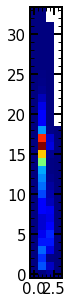

In [14]:
figure , axs = plt.subplots(1,1,figsize=[5,5])
# axs.imshow(np.flip(matrix_ext_1_vertical[0], 0),  cmap = ColorMap)  
axs.imshow(matrix_ext_1_vertical[0],  cmap = ColorMap)  

## Visualizar en PDF TODOS los muones encontrados 

In [15]:
list_path = path.split('_')
print(list_path)

['/home/bruce/Documents/Programas/Catalogo', 'Eventos/Diccionarios', 'Espetro', 'Muones/dict', 'straight', 'muons', 'CONNIE', 'NSAMP400', 'RUNID', '116', 'Images', '684', 'Elip', '0.9', 'Sol', '0.7', 'Skirts', '1', 'electrons.pkl']


In [16]:
##### SOLO CORRER ESTA CELDA SI EL NÚMERO DE EVENTOS NO ES MUY GRANDE O EL PROCESO SERÁ DEMASIADO TARDADO #####

### Nombre del PDF ###
# extension = 1
list_path = path.split('_')
Elip_value = float(list_path[13])
Solidit_value = float(list_path[15])
# Charge_units = list_path[17]
Charge_units = 'electrons'


color_matrix = [0.6, 0.4470, 0.2410] ## ALgo café

PDF_images_name = "Muones-Rectos_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
num_pages = 0

# list_n_vertical = []
# list_n_events = []
# for extension in (1,2,4):
extension = 1
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
w, h = A4 ## dimensiones del formato
c.showPage()

# for extension in (1,2,4):
c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
# n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
n_vertical = len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
n_horizontal = len(data_histogram['extension_' + str(extension)]['Horizontal_Events'])

# n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
n_last_events = 0
n_events = 0
# print(n_vertical % 9 != 0)
n_label = 0

if (n_vertical%9) == 0:
    # n_label = 1
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in data_histogram['extension_' + str(extension)]['Vertical_Events']:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        # print('n_vertical: ', n_vertical)
        if n_events < 10: 
            # print('n_events: ', n_events)
            charge = event.sum()
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event, cmap= ColorMap,  norm = colors.LogNorm())
            # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Label: ' + str(n_label))

            n_label = n_label + 1

            if n_events == 9:
                n_events = 10

        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

if (n_vertical%9) != 0:
    Resto = n_vertical%9
    # print(Resto)

    # n_label = 1
    
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in data_histogram['extension_' + str(extension)]['Vertical_Events']:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        if n_vertical >= Resto:
            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event, cmap= ColorMap,  norm = colors.LogNorm())
                # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Label: ' + str(n_label))
                n_label = n_label + 1
                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

        if  n_vertical < Resto:
            # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
            # print('n_vertical: ', n_vertical)
            # print('n_last_events: ', n_last_events)
            n_last_events = n_last_events + 1

            charge = event.sum()
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event, cmap= ColorMap,   norm = colors.LogNorm())
            # axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_ylabel('Charge: ' + str(charge))
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_ylabel('Label: ' + str(n_label))
            n_label =  n_label + 1

            if n_vertical == 0:
                # plt.show()
                # print('Estoy cuando n_vertical es 0')
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

n_last_events = 0
n_events = 0

fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
n_label = 0

if (n_horizontal%9) == 0:
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in data_histogram['extension_' + str(extension)]['Horizontal_Events']:
        n_horizontal = n_horizontal - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        # print('n_vertical: ', n_vertical)
        if n_events < 10: 
            # print('n_events: ', n_events)
            charge = event.sum()
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event, cmap= ColorMap,   norm = colors.LogNorm())
            # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Label: ' + str(n_label))
            n_label = n_label + 1

            if n_events == 9:
                n_events = 10

        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

if (n_horizontal%9) != 0:
    Resto = n_horizontal%9

    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in data_histogram['extension_' + str(extension)]['Horizontal_Events']:
        n_horizontal = n_horizontal - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        if n_horizontal >= Resto:
            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event, cmap= ColorMap,   norm = colors.LogNorm())
                # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Label: ' + str(n_label))
                n_label = n_label + 1

                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

        if  n_horizontal < Resto:
            n_last_events = n_last_events + 1
            # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
            # print('n_vertical: ', n_vertical)
            # print('n_last_events: ', n_last_events)
            charge = event.sum()
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event, cmap= ColorMap,  norm = colors.LogNorm())
            # axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Label: ' + str(n_label))

            n_label = n_label + 1

            if n_horizontal == 0:
                # plt.show()
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg




plt.close()
c.save()
